In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
from IPython.display import display
import shutil
from collections import OrderedDict

In [2]:
"""Get the width and height of the terminal window.
"""

width, height = shutil.get_terminal_size((80, 20))

"""
    :param work_dir (str) : Current working directory
    :param main_dir (str) : Always be set to ./SuperBone_ver1
    :param output_dir (str) : The default directory where all outputs are stored
"""  

work_dir = os.getcwd()
main_dir = os.path.dirname(work_dir)
initial_dir = main_dir
output_dir = os.path.join(main_dir,'analyze_figure')

import FileChooser

"""Initialize the class and set the initial directory, file type, and the type of file/folder to choose

    :param initial_dir (str) : Initial directory to open the file dialog
    :param file_type (str) : The type of file to select (e.g. "Image", "DICOM",...)
    :param choose_type (str) : The type of file/folder to select ("File", "Folder", "Multiple Files")
"""  

selector = FileChooser.Selector(initial_dir, file_type = "CSV", choose_type = "File")

"""Open a file dialog windows and return the source path

    :param file_src_path (str) : The absolute path of the source image
"""

file_src_path = selector.run()

Import File : D:/SuperBone_ver1.20_copy/feature_output.csv


In [5]:
df_feature = pd.read_csv(file_src_path,sep=',')
# display(df_feature)

,Class,Patient Name,ID,Section,Offset_X,Offset_Y,Porosity,Ave Bone Angle,Std Bone Angle,Ave Thinkness,...,Ave Compactness,Std Compactness,Ave Circularity,Std Circularity,Ave Width to Length,Std Width to Length,Ave Centroid_X,Std Centroid_X,Ave Centroid_Y,Std Centroid_Y
0,Aves,RHEA_TBT,22,55,-50,-80,0.577855,48.57,33.52,2.146,...,0.790,0.166,1.066,0.810,0.679,0.225,50.335,32.390,58.798,30.785
1,Aves,RHEA_TBT,22,55,-40,-80,0.580834,48.62,33.59,2.099,...,0.803,0.174,1.404,2.210,0.678,0.230,51.185,30.413,59.668,31.538
2,Aves,RHEA_TBT,22,56,50,-80,0.569973,47.39,33.36,2.060,...,0.769,0.172,1.191,1.776,0.678,0.222,50.985,30.562,59.658,30.243


Plot file saved : feature_scatter.png


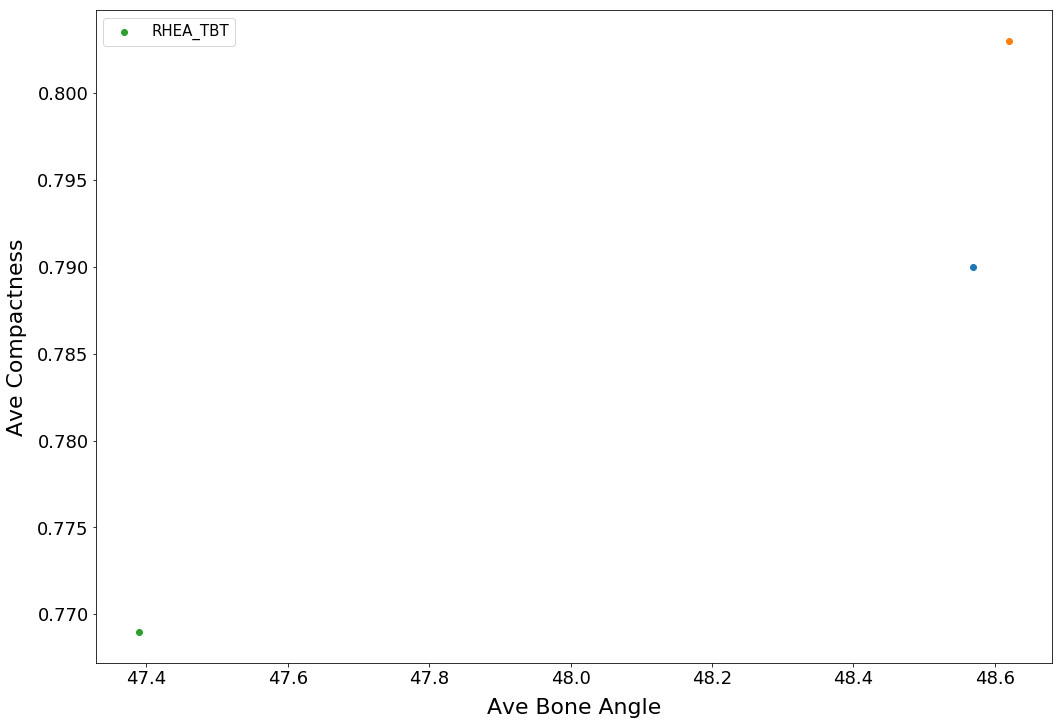

In [7]:
fig, ax = plt.subplots(figsize=plt.figaspect(0.7)*3) 
for patient_name, x, y in zip(df_feature['Patient Name'], 
                                  df_feature['Ave Bone Angle'], df_feature['Ave Compactness']):
    plt.scatter(x, y, label=patient_name)
    
plt.xticks(fontsize=18) 
plt.xlabel('Ave Bone Angle',fontsize=22,labelpad=10)
plt.yticks(fontsize=18) 
plt.ylabel('Ave Compactness',fontsize=22,labelpad=10)

handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), loc='best', fontsize=15)   

save_path = os.path.join(output_dir,'feature_scatter.png')
plt.savefig(save_path, bbox_inches='tight',facecolor = 'white', dpi=100)
print('Plot file saved : feature_scatter.png')
plt.show()